In [1]:
from t_map.garbanzo.huri import Huri
from t_map.hummus.hummus import Hummus
from t_map.hummus.hummus_score import HummusScore, ScoreTypes
from t_map.feta.randomwalk import RandomWalkWithRestart
from t_map.garbanzo.stringdb import StringDB
from t_map.garbanzo.merge import merge



data = Huri("../data/alzheimers", with_hugo=True)
data2 = StringDB("../data/alzheimers")
merged = merge([data, data2])
config = {
	"alpha": 0.85,
	"k": len(data.graph.nodes()),
}
scoring = HummusScore(score_type=ScoreTypes.TOP_K, k=config["k"])
runner = Hummus(merged, with_scoring=scoring)
model = RandomWalkWithRestart(alpha=config["alpha"])

999.0
1


In [2]:
for i, test_runner in enumerate(runner.with_cv(k_fold="LOO")):
	with test_runner as (disease_genes, graph, fn):
		predictions = model(disease_genes, graph)
		fn(predictions)


In [3]:

scoring.compute_roc()
auc = scoring.auc_roc(threshold=0.3)
print(auc)

#print(scoring._testing_scores[0])

AttributeError: 'HummusScore' object has no attribute 'auc_roc'

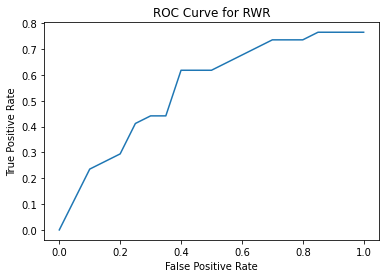

In [19]:
points  = scoring._roc
import matplotlib.pyplot as plt
# Plot the ROC curve using points in matplotlib.
plt.plot(list(map(lambda x: x[1], points)), list(map(lambda x: x[0], points)))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for RWR")
plt.show()